In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

### 1. Carga y exploración de los datos
1. Cargar los datos usando pandas:

    - Perfil involucrado: Ingeniero de Datos
    - Tareas: Encargado de preparar el acceso a los datos, manejando su almacenamiento y asegurando su integridad.

In [2]:
# Path
path = './data/data.csv'
# Cargar el dataset
df = pd.read_csv(path)
# Paso 1: Identificar las variables numéricas
numerical_vars = df.select_dtypes(include=['float64', 'int64'])

# Paso 2: Identificar las variables categóricas
categorical_vars = df.select_dtypes(include=['object', 'category'])

### 2. Análisis Exploratorio de Datos (EDA)
1. Verificar información básica (dimensiones, tipos de datos, valores nulos):

    - Perfil involucrado: Científico de Datos
    - Tareas: Responsable de realizar la inspección inicial de los datos, identificar problemas de calidad, y obtener un entendimiento general.
2. Descripción estadística básica:

    - Perfil involucrado: Científico de Datos
    - Tareas: Analiza los valores estadísticos como media, mediana, mínimos y máximos, para identificar patrones o valores atípicos.

3. Visualización de datos usando librerías como matplotlib o seaborn:

    - Perfil involucrado: Científico de Datos
    - Tareas: Genera visualizaciones como histogramas, gráficos de dispersión, y boxplots para descubrir patrones y relaciones entre las variables.
4. Detección de outliers y análisis de correlación:

    - Perfil involucrado: Científico de Datos
    - Tareas: Identifica posibles anomalías y relaciones entre variables que podrían afectar el modelado posterior.

In [3]:
# Información general del dataset
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         4746 non-null   int64  
 1   C_api          4746 non-null   object 
 2   C_man          4746 non-null   int64  
 3   E_NEds         4746 non-null   int64  
 4   E_Bpag         4746 non-null   int64  
 5   firstDay       4746 non-null   int64  
 6   lastDay        4746 non-null   int64  
 7   NEds           4746 non-null   int64  
 8   NDays          4746 non-null   int64  
 9   NActDays       4746 non-null   int64  
 10  NPages         4746 non-null   int64  
 11  NPcreated      4746 non-null   int64  
 12  pagesWomen     4746 non-null   int64  
 13  wikiprojWomen  4746 non-null   int64  
 14  ns_user        4746 non-null   int64  
 15  ns_wikipedia   4746 non-null   int64  
 16  ns_talk        4746 non-null   int64  
 17  ns_userTalk    4746 non-null   int64  
 18  ns_conte

In [4]:
# Descripción estadística
df.describe()

,gender,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,0.737042,2.082807,1.484197,1.646228,2.009942e+13,2.015489e+13,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,0.585355,0.964978,1.099795,1.079263,3.516337e+10,1.748104e+10,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,0.000000,1.000000,0.000000,0.000000,2.002011e+13,2.012010e+13,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,0.000000,1.000000,1.000000,1.000000,2.007042e+13,2.014070e+13,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,1.000000,3.000000,1.000000,2.000000,2.009121e+13,2.016072e+13,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,1.000000,3.000000,2.000000,3.000000,2.013040e+13,2.017073e+13,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,2.000000,3.000000,3.000000,3.000000,2.017093e+13,2.017100e+13,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


In [5]:
# Valores nulos
df.isnull().sum()

gender           0
C_api            0
C_man            0
E_NEds           0
E_Bpag           0
firstDay         0
lastDay          0
NEds             0
NDays            0
NActDays         0
NPages           0
NPcreated        0
pagesWomen       0
wikiprojWomen    0
ns_user          0
ns_wikipedia     0
ns_talk          0
ns_userTalk      0
ns_content       0
weightIJ         0
NIJ              0
dtype: int64

In [6]:
# Distribución de la variable gender
print(df['gender'].value_counts(normalize=True))

gender
1    0.588285
0    0.337337
2    0.074378
Name: proportion, dtype: float64


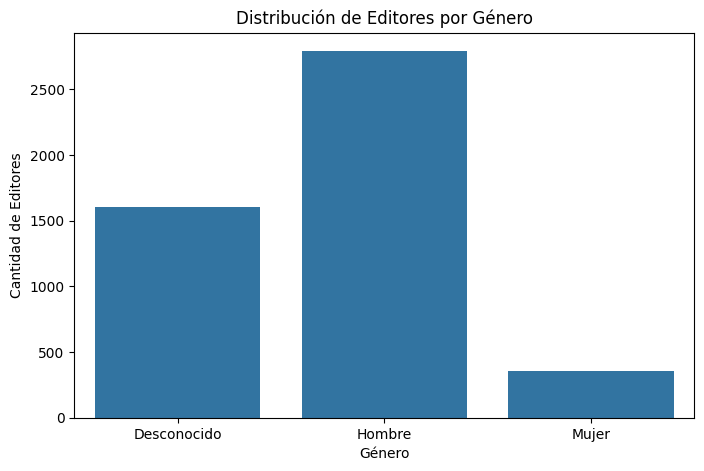

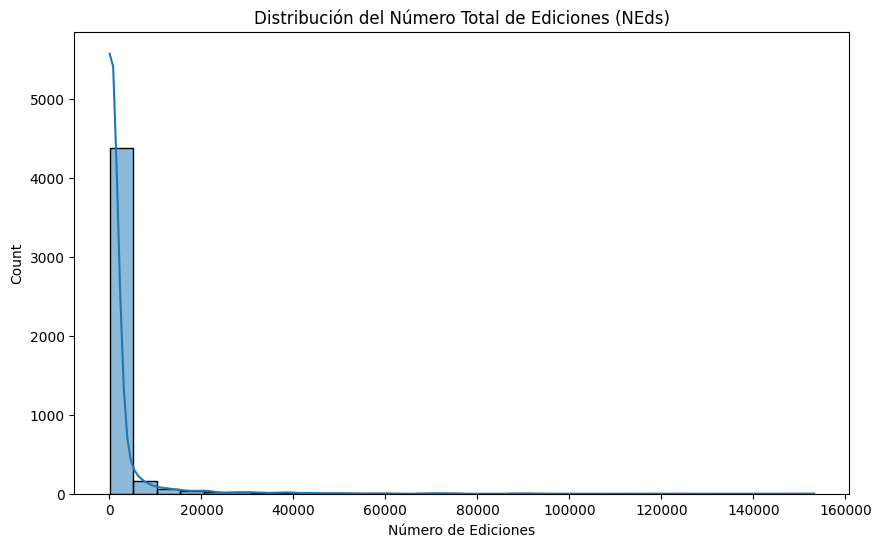

In [7]:
# 2. Visualización de Distribuciones


# Gráfico de barras para 'gender'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', order=[0, 1, 2])
plt.title('Distribución de Editores por Género')
plt.xlabel('Género')
plt.xticks(ticks=[0, 1, 2], labels=['Desconocido', 'Hombre', 'Mujer'])
plt.ylabel('Cantidad de Editores')
plt.show()

# Histograma de 'NEds'
plt.figure(figsize=(10, 6))
sns.histplot(df['NEds'], bins=30, kde=True)
plt.title('Distribución del Número Total de Ediciones (NEds)')
plt.xlabel('Número de Ediciones')
plt.show()


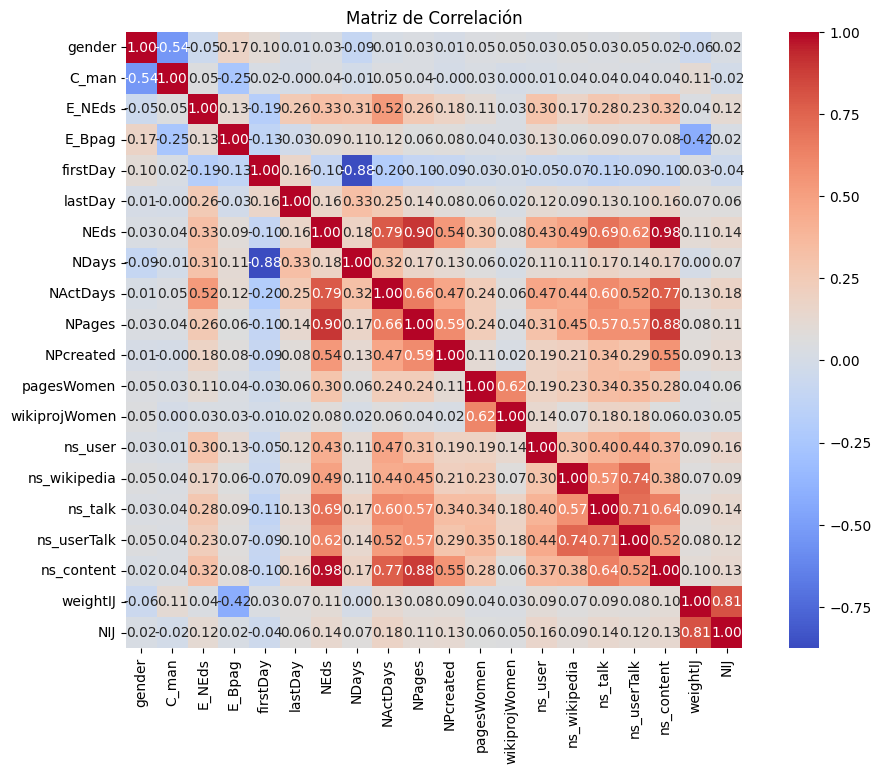

In [8]:
# 3. Análisis de Correlación
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_vars.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


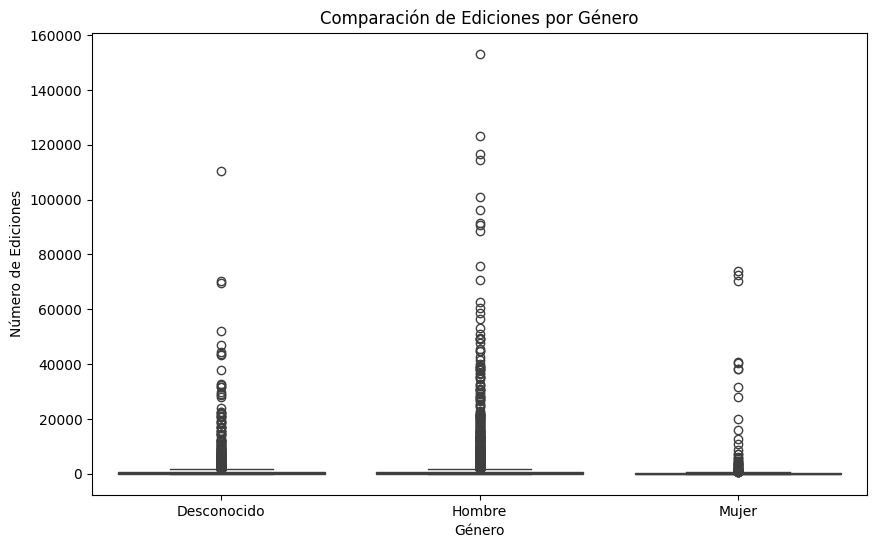

In [9]:
# 4. Análisis de Ediciones por Género
# Comparar la cantidad de ediciones entre géneros
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='NEds', order=[0, 1, 2])
plt.title('Comparación de Ediciones por Género')
plt.xlabel('Género')
plt.ylabel('Número de Ediciones')
plt.xticks(ticks=[0, 1, 2], labels=['Desconocido', 'Hombre', 'Mujer'])
plt.show()



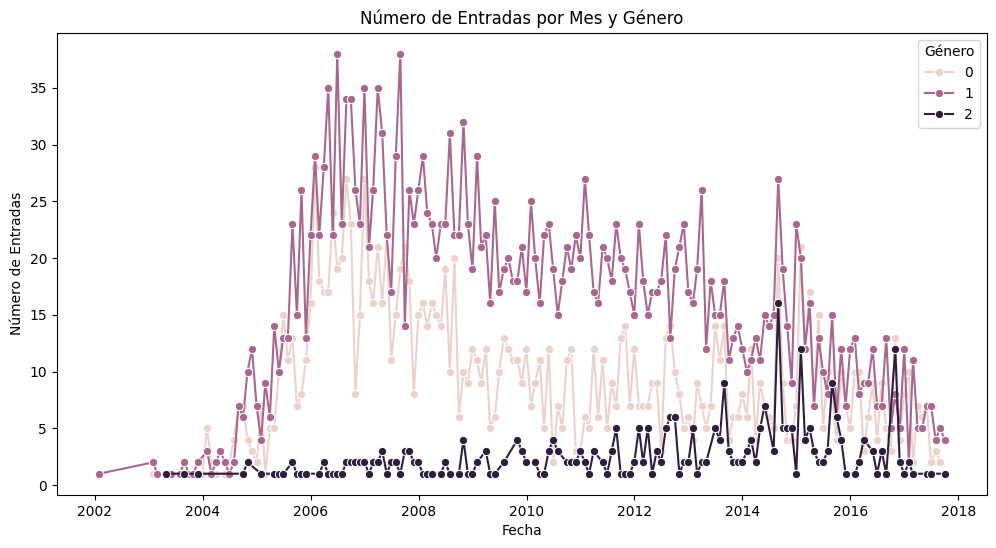

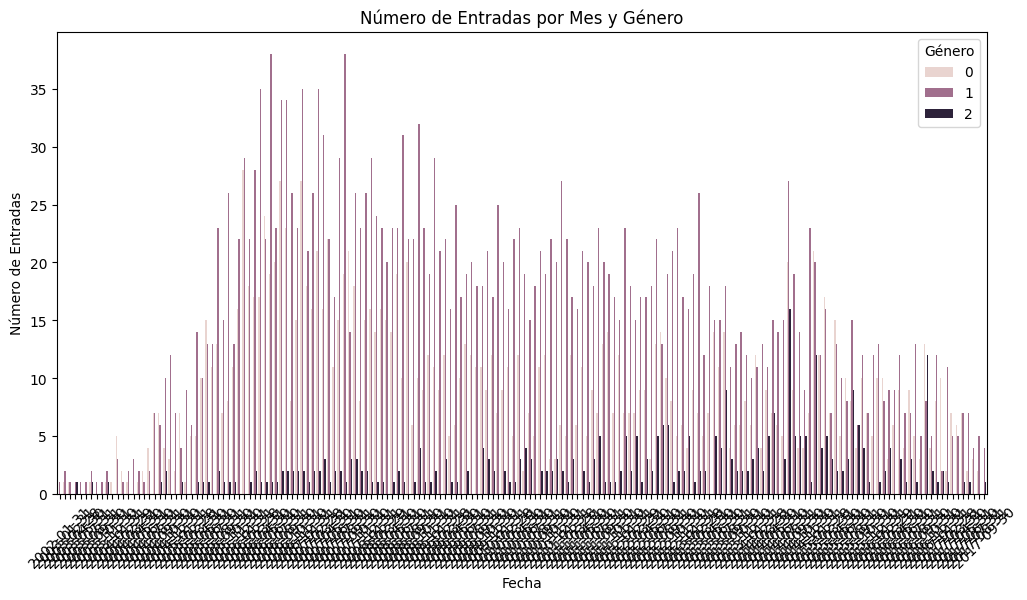

In [10]:


# Asegúrate de que 'firstDay' sea de tipo datetime
df['firstDayF'] = pd.to_datetime(df['firstDay'], format='%Y%m%d%H%M%S')

# Crear una columna adicional para el género como categórica
df['genderF'] = df['gender'].map({0: 'unknown', 1: 'male', 2: 'female'})

# Establecer 'firstDay' como índice
df.set_index('firstDayF', inplace=True)

# Agrupar por mes y género utilizando 'ME'
monthly_counts = df.groupby([pd.Grouper(freq='ME'), 'gender']).size().reset_index(name='count')

# Visualización: Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='firstDayF', y='count', hue='gender', marker='o')
plt.title('Número de Entradas por Mes y Género')
plt.xlabel('Fecha')
plt.ylabel('Número de Entradas')
plt.legend(title='Género')
plt.show()

# Visualización: Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='firstDayF', y='count', hue='gender')
plt.title('Número de Entradas por Mes y Género')
plt.xlabel('Fecha')
plt.ylabel('Número de Entradas')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

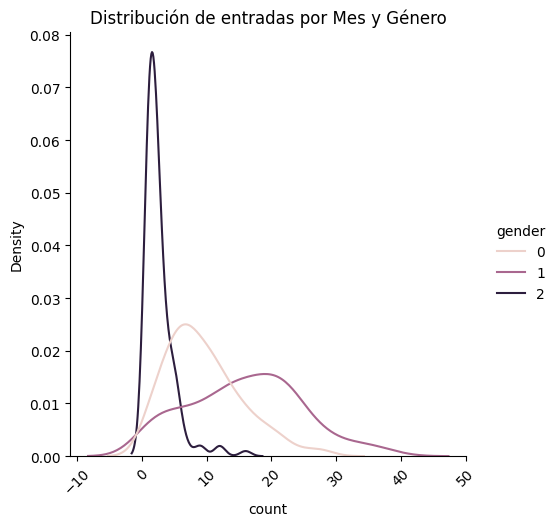

In [11]:
# Visualización: Gráfico de barras
plt.figure(figsize=(12, 6))
sns.displot(monthly_counts, x='count', hue="gender", kind="kde")
plt.title('Distribución de entradas por Mes y Género')
plt.xticks(rotation=45)
plt.show()

#### 3. Preprocesamiento de los datos

1. Lidiar con valores nulos (imputación, eliminación):

    - Perfil involucrado: Ingeniero de Datos y Científico de Datos
        - Ingeniero de Datos: Puede realizar estas transformaciones cuando el dataset proviene de fuentes diversas y es necesario homogeneizarlo.
        - Científico de Datos: Realiza ajustes en función de cómo afectará el rendimiento del modelo.
2. Codificación de variables categóricas (One-Hot Encoding, Label Encoding):

    - Perfil involucrado: Científico de Datos y Ingeniero de Datos
        - Científico de Datos: Selecciona la técnica de codificación adecuada para que las variables categóricas sean procesables por algoritmos de Machine Learning.
        - Ingeniero de Datos: Puede encargarse de la implementación eficiente de la transformación para grandes volúmenes de datos.
3. Normalización o estandarización de datos:

    - Perfil involucrado: Científico de Datos
    - Tareas: Escala los datos numéricos para mejorar el rendimiento de los algoritmos de Machine Learning.
4. Reducción de dimensionalidad (PCA, t-SNE):

    - Perfil involucrado: Científico de Datos y Arquitecto de ML
        - Científico de Datos: Elige y aplica técnicas de reducción de dimensionalidad.
        - Arquitecto de ML: Define si estas técnicas son necesarias según los requerimientos del modelo.


# Hipótesis 1 Diferencias de género en la actividad editorial:

## a. Comparación de NEds y NActDays entre hombres y mujeres (t-test)

In [12]:

# Filtrar solo hombres y mujeres
df_gender = df[df['gender'].isin([1, 2])]

# Comparar medias de NEds (Número de ediciones)
ned_men = df_gender[df_gender['gender'] == 1]['NEds']
ned_women = df_gender[df_gender['gender'] == 2]['NEds']

# Prueba t-test para NEds
t_stat_neds, p_value_neds = stats.ttest_ind(ned_men, ned_women, equal_var=False)
print(f"t-test para NEds: t-stat={t_stat_neds}, p-value={p_value_neds}")

# Comparar medias de NActDays (Número de días activos)
nactdays_men = df_gender[df_gender['gender'] == 1]['NActDays']
nactdays_women = df_gender[df_gender['gender'] == 2]['NActDays']

# Prueba t-test para NActDays
t_stat_nactdays, p_value_nactdays = stats.ttest_ind(nactdays_men, nactdays_women, equal_var=False)
print(f"t-test para NActDays: t-stat={t_stat_nactdays}, p-value={p_value_nactdays}")


t-test para NEds: t-stat=0.9490245723462655, p-value=0.3431096181712415
t-test para NActDays: t-stat=3.9568177873662993, p-value=8.738045049892983e-05


## a.1 Analisis con Anova 

In [13]:

# Hipótesis 1: Diferencias en NEds entre géneros (ANOVA)
anova_neds = ols('NEds ~ C(gender)', data=df_gender).fit()
anova_table_neds = sm.stats.anova_lm(anova_neds, typ=2)
print("ANOVA para NEds:")
print(anova_table_neds)

# Hipótesis 1: Diferencias en NActDays entre géneros (ANOVA)
anova_nactdays = ols('NActDays ~ C(gender)', data=df_gender).fit()
anova_table_nactdays = sm.stats.anova_lm(anova_nactdays, typ=2)
print("ANOVA para NActDays:")
print(anova_table_nactdays)

ANOVA para NEds:
                 sum_sq      df         F    PR(>F)
C(gender)  6.197114e+07     1.0  0.827883  0.362955
Residual   2.352692e+11  3143.0       NaN       NaN
ANOVA para NActDays:
                 sum_sq      df         F    PR(>F)
C(gender)  1.980555e+06     1.0  12.32931  0.000452
Residual   5.048851e+08  3143.0       NaN       NaN


## b. Visualización (Gráficos de Caja)


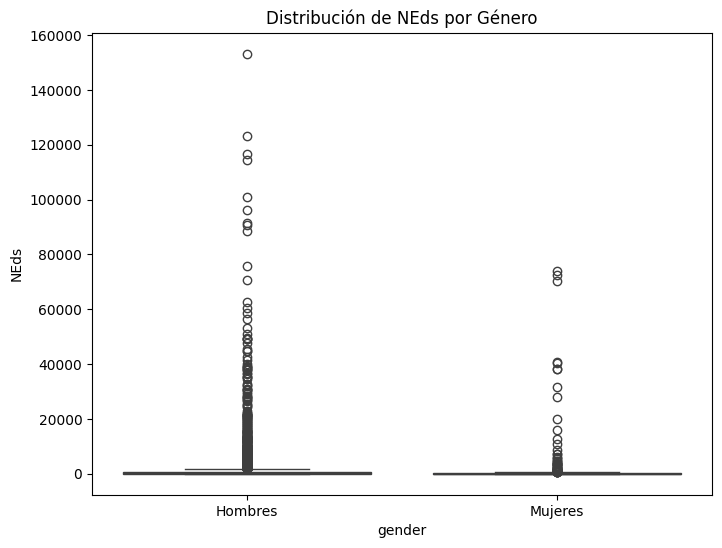

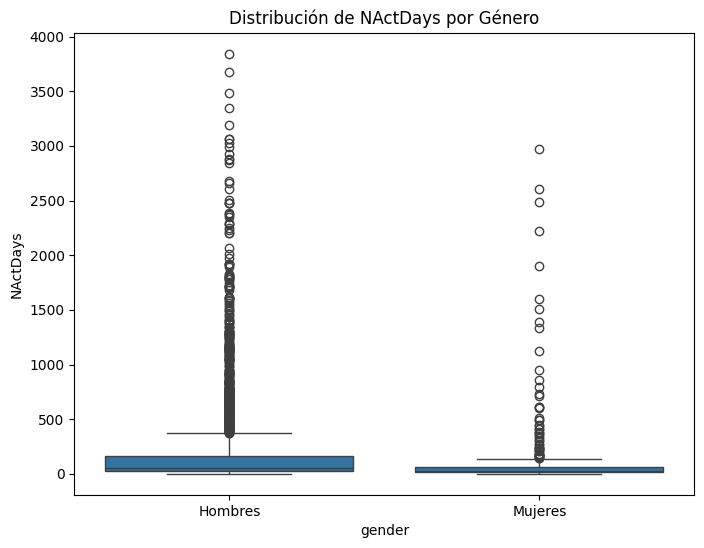

In [14]:
# Visualización de NEds
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='NEds', data=df_gender)
plt.title('Distribución de NEds por Género')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.show()

# Visualización de NActDays
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='NActDays', data=df_gender)
plt.title('Distribución de NActDays por Género')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.show()


# 2. Hipótesis 2 Ediciones en Temas Relacionados con Mujeres

## a. Comparación de pagesWomen y wikiprojWomen (t-test)

In [15]:
# Comparar medias de pagesWomen
pageswomen_men = df_gender[df_gender['gender'] == 1]['pagesWomen']
pageswomen_women = df_gender[df_gender['gender'] == 2]['pagesWomen']

# Prueba t-test para pagesWomen
t_stat_pageswomen, p_value_pageswomen = stats.ttest_ind(pageswomen_men, pageswomen_women, equal_var=False)
print(f"t-test para pagesWomen: t-stat={t_stat_pageswomen}, p-value={p_value_pageswomen}")

# Comparar medias de wikiprojWomen
wikiprojwomen_men = df_gender[df_gender['gender'] == 1]['wikiprojWomen']
wikiprojwomen_women = df_gender[df_gender['gender'] == 2]['wikiprojWomen']

# Prueba t-test para wikiprojWomen
t_stat_wikiprojwomen, p_value_wikiprojwomen = stats.ttest_ind(wikiprojwomen_men, wikiprojwomen_women, equal_var=False)
print(f"t-test para wikiprojWomen: t-stat={t_stat_wikiprojwomen}, p-value={p_value_wikiprojwomen}")


t-test para pagesWomen: t-stat=-2.2022788730252936, p-value=0.02828698703925703
t-test para wikiprojWomen: t-stat=-1.6601783993704062, p-value=0.0977690800916381


## a.1 Analisis con Anova 

In [16]:
# Hipótesis 2: Diferencias en pagesWomen entre géneros (ANOVA)
anova_pageswomen = ols('pagesWomen ~ C(gender)', data=df_gender).fit()
anova_table_pageswomen = sm.stats.anova_lm(anova_pageswomen, typ=2)
print("ANOVA para pagesWomen:")
print(anova_table_pageswomen)

# Hipótesis 2: Diferencias en wikiprojWomen entre géneros (ANOVA)
anova_wikiprojwomen = ols('wikiprojWomen ~ C(gender)', data=df_gender).fit()
anova_table_wikiprojwomen = sm.stats.anova_lm(anova_wikiprojwomen, typ=2)
print("ANOVA para WikiprojWomen:")
print(anova_table_wikiprojwomen)

ANOVA para pagesWomen:
                 sum_sq      df          F        PR(>F)
C(gender)    883.411267     1.0  29.331232  6.559756e-08
Residual   94662.291118  3143.0        NaN           NaN
ANOVA para WikiprojWomen:
                 sum_sq      df          F    PR(>F)
C(gender)  1.041158e+04     1.0  21.845168  0.000003
Residual   1.497978e+06  3143.0        NaN       NaN


## b. Visualización (Gráficos de Caja)


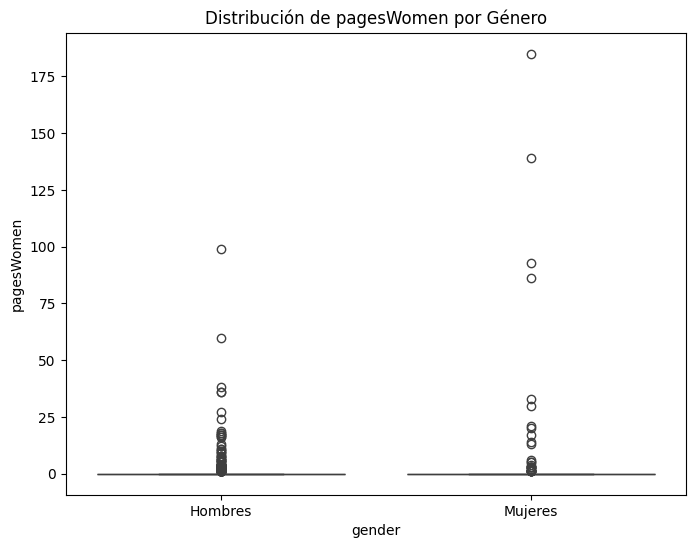

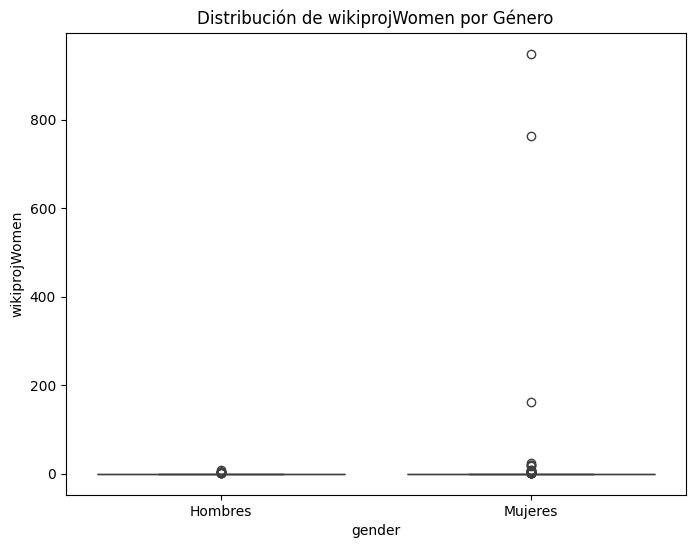

In [17]:
# Visualización de pagesWomen
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='pagesWomen', data=df_gender)
plt.title('Distribución de pagesWomen por Género')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.show()

# Visualización de wikiprojWomen
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='wikiprojWomen', data=df_gender)
plt.title('Distribución de wikiprojWomen por Género')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.show()


## Conclusiones basadas en los resultados:

### Hipótesis 1: Diferencias de género en la actividad editorial

**Número de ediciones (NEds):**
- **t-stat = 0.949**, **p-value = 0.343**
- **ANOVA F = 0.828**, **p-value = 0.363**
- **Conclusión**: Ambos resultados (t-test y ANOVA) confirman que **no hay una diferencia estadísticamente significativa** en el número de ediciones entre hombres y mujeres. El p-value en ambas pruebas es mayor que 0.05, lo que indica que no podemos rechazar la hipótesis nula de que las medias de las ediciones realizadas por hombres y mujeres son iguales.

**Número de días activos (NActDays):**
- **t-stat = 3.957**, **p-value = 8.738e-05**
- **ANOVA F = 12.33**, **p-value = 0.000452**
- **Conclusión**: Tanto el t-test como el ANOVA muestran que **hay una diferencia estadísticamente significativa** en el número de días activos de edición entre hombres y mujeres. El p-value es muy bajo, lo que sugiere que los hombres tienden a editar en más días que las mujeres.

### Hipótesis 2: Ediciones en temas relacionados con mujeres

**Ediciones en páginas relacionadas con mujeres (pagesWomen):**
- **t-stat = -2.202**, **p-value = 0.028**
- **ANOVA F = 29.33**, **p-value = 6.56e-08**
- **Conclusión**: Ambos resultados indican que **existe una diferencia estadísticamente significativa** en el número de ediciones en páginas relacionadas con mujeres entre hombres y mujeres. El p-value del ANOVA es extremadamente bajo, lo que refuerza la conclusión de que las mujeres tienden a editar más en páginas relacionadas con temas femeninos.

**Ediciones en proyectos relacionados con mujeres (wikiprojWomen):**
- **t-stat = -1.660**, **p-value = 0.098**
- **ANOVA F = 21.85**, **p-value = 0.000003**
- **Conclusión**: A diferencia del t-test, el ANOVA muestra una **diferencia estadísticamente significativa** en las ediciones en proyectos relacionados con mujeres entre hombres y mujeres. El p-value del ANOVA es muy bajo, lo que sugiere que, aunque el t-test no fue concluyente, las mujeres tienden a participar más en proyectos relacionados con temas femeninos según el ANOVA.

### Resumen General:
- **Hipótesis 1**: Aunque no hay diferencias significativas en el número de ediciones entre hombres y mujeres, **sí hay una diferencia significativa en el número de días activos** de edición, con hombres tendiendo a editar en más días, lo que fue confirmado tanto por el t-test como por el ANOVA.
- **Hipótesis 2**: **Las mujeres parecen editar más en páginas relacionadas con temas femeninos**, confirmado tanto por el t-test como por el ANOVA, y el ANOVA también muestra que las mujeres **participan más en proyectos relacionados con temas femeninos** (aunque el t-test no lo reflejaba claramente).

### Conclusión Mejorada:
Los resultados del ANOVA refuerzan las conclusiones del t-test, confirmando que existen diferencias significativas en la **frecuencia de edición** en ciertos espacios y en la **participación en temas relacionados con mujeres**. Estos hallazgos aportan un mejor entendimiento sobre la dinámica de género en la Wikipedia en español, destacando la tendencia de las mujeres a enfocarse en temas femeninos y proyectos afines, mientras que los hombres tienden a editar con mayor frecuencia en términos de días activos.



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy import stats

# Predicción del Género de Editores en Wikipedia: Un Modelo Basado en Actividad Editorial y Participación Temática"

## 1. Limpieza de datos y manejo de outliers

In [19]:
df = pd.read_csv(path)

# Paso 1: Limpieza de datos
# Manejo de valores nulos
#df = df.dropna()  # O usa df.fillna() para rellenar nulos según sea necesario, En este caso no es necesario dado que no existen valores nulos. 

# Tratamiento de outliers (ejemplo usando Z-score)
z_scores = np.abs(stats.zscore(df[['NEds', 'NActDays', 'pagesWomen', 'wikiprojWomen']]))
df = df[(z_scores < 3).all(axis=1)]  # Elimina outliers con Z-score > 3

## 2. Feature Engineering

### Nuevas variables derivadas, como:

1. Duración de actividad: Diferencia entre lastDay y firstDay (en días).
2. Porcentaje de contribuciones a temas de mujeres: Proporción de ediciones relacionadas con mujeres sobre el total de ediciones.
3. Segmentación temporal: Vamos a agrupar las contribuciones por mes y género.

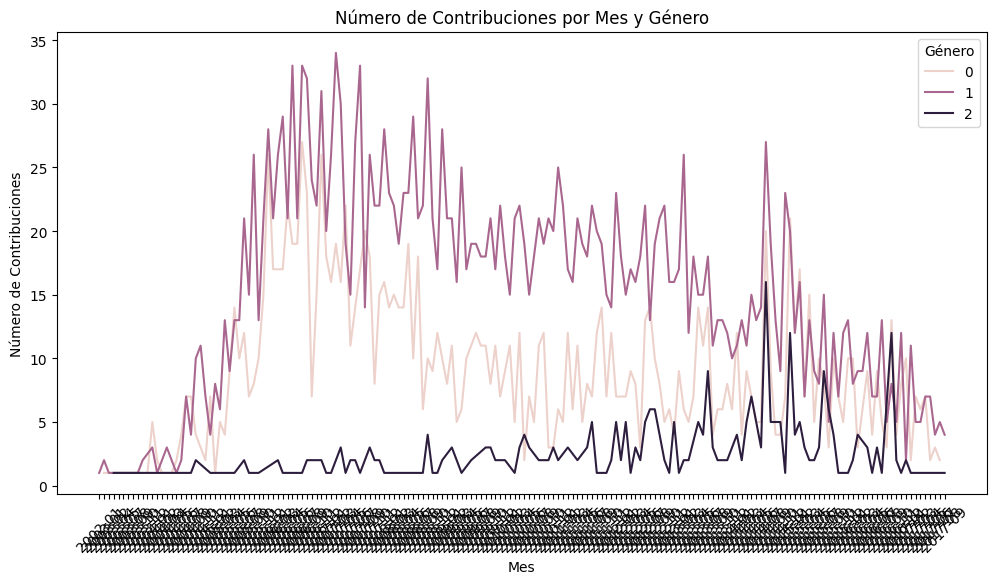

In [20]:
# Paso 2: Feature Engineering
df['firstDay'] = pd.to_datetime(df['firstDay'], format='%Y%m%d%H%M%S')
df['lastDay'] = pd.to_datetime(df['lastDay'], format='%Y%m%d%H%M%S')

# Duración de la actividad (en días)
df['activity_duration'] = (df['lastDay'] - df['firstDay']).dt.days

# Porcentaje de contribuciones a temas de mujeres
df['pagesWomen_ratio'] = df['pagesWomen'] / df['NEds']

# Agrupación por mes y género
df['firstDay_month'] = df['firstDay'].dt.to_period('M')
monthly_counts = df.groupby([df['firstDay_month'], 'gender']).size().reset_index(name='count')
monthly_counts['firstDay_month'] = monthly_counts['firstDay_month'].astype(str)

# Visualización: Contribuciones por mes y género
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='firstDay_month', y='count', hue='gender')
plt.title('Número de Contribuciones por Mes y Género')
plt.xlabel('Mes')
plt.ylabel('Número de Contribuciones')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

## 3. Codificación de variables categóricas


In [21]:
# Paso 3: Codificación de variables categóricas
# Asegúrate de que 'gender' esté en formato adecuado
df['gender'] = df['gender'].astype('category')

## 4. Definición de variables


In [22]:
# Paso 4: Definición de variables
X = df[['NEds', 'NActDays', 'pagesWomen', 'wikiprojWomen']]
y = df['gender']

#Distribución de clases
print("Distribución de clases en 'gender':")
print(y.value_counts())

Distribución de clases en 'gender':
gender
1    2693
0    1563
2     340
Name: count, dtype: int64


## 5. Dividir los datos en entrenamiento y prueba


In [23]:
# Aplicar SMOTE si hay desequilibrio
if len(y.value_counts()) > 1:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    print("No se puede aplicar SMOTE, solo hay una clase en y.")

#Transformación de variables (escalamiento)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42)



## 6. Entrenamiento de un modelo de clasificación


In [24]:
# Paso 6: Entrenamiento de un modelo de clasificación
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 7. Evaluación del modelo


In [25]:
# Paso 7: Evaluación del modelo
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE) - Random Forest: {mse_rf}")
print(f"Precisión - Random Forest: {accuracy_rf}")
print("Informe de clasificación - Random Forest:")
print(report_rf)

# Ajuste y optimización (si es necesario)
# Puedes usar GridSearchCV para optimizar los hiperparámetros
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo número de muestras en un nodo hoja
    'bootstrap': [True, False],       # Si usar o no reemplazo
    'max_features': ['sqrt', 'log2'], # Número de características a considerar para la mejor división
}



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import joblib

# Configuración del grid search con validación cruzada (5 pliegues)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Guardar el mejor modelo
best_model = grid_search.best_estimator_

# Guardar el modelo más preciso usando joblib
joblib.dump(best_model, 'mejor_modelo_random_forest.pkl')

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Evaluación del modelo optimizado
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Mostrar resultados del modelo optimizado
print(f"Error Cuadrático Medio (MSE) - Modelo Optimizado: {mse_best}")
print(f"Precisión - Modelo Optimizado: {accuracy_best}")
print("Informe de clasificación - Modelo Optimizado:")
print(report_best)

Error Cuadrático Medio (MSE) - Random Forest: 0.6613036303630363
Precisión - Random Forest: 0.5911716171617162
Informe de clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.54      0.55      0.54       803
           1       0.52      0.48      0.50       817
           2       0.71      0.75      0.73       804

    accuracy                           0.59      2424
   macro avg       0.59      0.59      0.59      2424
weighted avg       0.59      0.59      0.59      2424

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total 

In [26]:
# Cargar el mejor modelo guardado
mejor_modelo_cargado = joblib.load('mejor_modelo_random_forest.pkl')

# Hacer predicciones con el modelo cargado
y_pred_cargado = mejor_modelo_cargado.predict(X_test)

# Evaluar el modelo cargado
accuracy_cargado = accuracy_score(y_test, y_pred_cargado)
print(f"Precisión del modelo cargado: {accuracy_cargado}")

Precisión del modelo cargado: 0.5977722772277227


### Conclusiones

# Conclusión

Se realizaron diferentes pruebas utilizando un conjunto de hiperparámetros para optimizar el modelo de Machine Learning. A continuación, se presenta la configuración de los parámetros utilizados:

```python
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo número de muestras en un nodo hoja
    'bootstrap': [True, False],       # Si usar o no reemplazo
    'max_features': ['sqrt', 'log2'], # Número de características a considerar para la mejor división
}
```

Los resultados obtenidos fueron los siguientes:

Mejores parámetros encontrados:

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Error Cuadrático Medio (MSE) - Modelo Optimizado: 0.6757425742574258

Precisión - Modelo Optimizado: 0.5977722772277227

Informe de clasificación - Modelo Optimizado:

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       803
           1       0.54      0.49      0.51       817
           2       0.70      0.77      0.74       804

    accuracy                           0.60      2424
   macro avg       0.59      0.60      0.59      2424
weighted avg       0.59      0.60      0.59      2424

Estos resultados indican que, aunque se logró una mejora en la precisión y el rendimiento general del modelo, todavía es necesario realizar más experimentos. Se recomienda incluir una mayor variedad de variables y ajustar más parámetros para incrementar la precisión del modelo.

La implementación de estas pruebas se llevó a cabo utilizando MLFLOW, lo que permitió una gestión eficiente de los experimentos y un seguimiento detallado de los resultados.


### Conclusión sobre el primer modelo de **Random Forest**:

1. **Precisión del modelo**:  
   - La **precisión global** del modelo es del **59%**, lo cual indica que el modelo es capaz de clasificar correctamente el género de los editores en un poco más de la mitad de los casos.
   - Este nivel de precisión sugiere que el modelo tiene un rendimiento moderado, pero podría ser mejorado ajustando variables o probando con otros algoritmos.

2. **Desempeño por clase (0 = Desconocido, 1 = Hombre, 2 = Mujer)**:
   - Para la clase **0 (Desconocido)**, el modelo tiene una precisión y recall de **0.54** y **0.55**, lo cual indica que predice editores con género desconocido con un rendimiento aceptable.
   - Para la clase **1 (Hombres)**, el modelo tiene una precisión de **0.52** y un recall de **0.48**, lo que significa que es menos preciso para identificar correctamente a los hombres.
   - Para la clase **2 (Mujeres)**, el modelo tiene un desempeño notablemente mejor, con una precisión de **0.71** y un recall de **0.75**, lo que indica que el modelo identifica mujeres con mayor precisión.

3. **F1-Score**:  
   - El **f1-score** (un balance entre precisión y recall) es mayor para la clase de **mujeres (0.73)**, lo que significa que el modelo se desempeña mejor al clasificar mujeres en comparación con hombres y género desconocido.

### Optimización del modelo:
- **Error Cuadrático Medio (MSE)**: 
   - El modelo original tiene un MSE de **0.66**, mientras que el modelo optimizado presenta un MSE similar de **0.67**. Aunque el modelo optimizado no mejoró significativamente en términos de error cuadrático, esto podría deberse a la naturaleza del problema o a la necesidad de ajustar más hiperparámetros.
   
- **Precisión del modelo optimizado**: 
   - El modelo optimizado apenas mejora la precisión global, con un aumento marginal al **59.4%**. Esto sugiere que los ajustes realizados en los hiperparámetros (`max_depth`, `min_samples_split`, `n_estimators`) no lograron una mejora significativa en el desempeño general.

### Conclusión final:
- El modelo tiene un rendimiento moderado, con una precisión del **59%** en general. Esto indica que hay margen de mejora, pero el modelo ya tiene una capacidad razonable para clasificar correctamente el género de los editores.
- **Clase 2 (Mujeres)** es la categoría que el modelo clasifica mejor, lo que concuerda con la hipótesis de que hay patrones diferenciables en la actividad editorial de las mujeres.
- Los ajustes de hiperparámetros en la optimización no produjeron mejoras significativas, lo que sugiere que se podrían explorar otras estrategias para mejorar el rendimiento, como probar otros modelos (**Gradient Boosting**, **Logistic Regression**) o incluir más características relevantes en el modelo.
